# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 7.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 14.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 37.3MB/s]


In [22]:
data = pd.read_csv('./train.csv')

In [23]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [24]:
#Посмотрим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [25]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [26]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Напервый взгляд кажется, что пропусков нет, но посомтрим есть ли какие нибду необычные символы по-типу - "?" знаков или же пропусков

In [27]:
#Заменим все ? На Nan
data.replace("?", np.nan, inplace=True)
data.replace(" ? ", np.nan, inplace=True)
data.replace("", np.nan, inplace=True)
data.replace(" ", np.nan, inplace=True)

Хмммм, в numeric катеогрии есть колонка totalSpent, но она обеъекта object, поменяем ее на int или float

In [28]:
data['TotalSpent'].value_counts()

,count
TotalSpent,
20.2,9
19.75,8
20.05,6
19.65,6
19.9,5
...,...
4264,1
24.25,1
1090.6,1


Видно что данные float, поэтому сделаем замену на тип float

In [29]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [30]:
data.shape

(5282, 20)

Построим таблице по nan

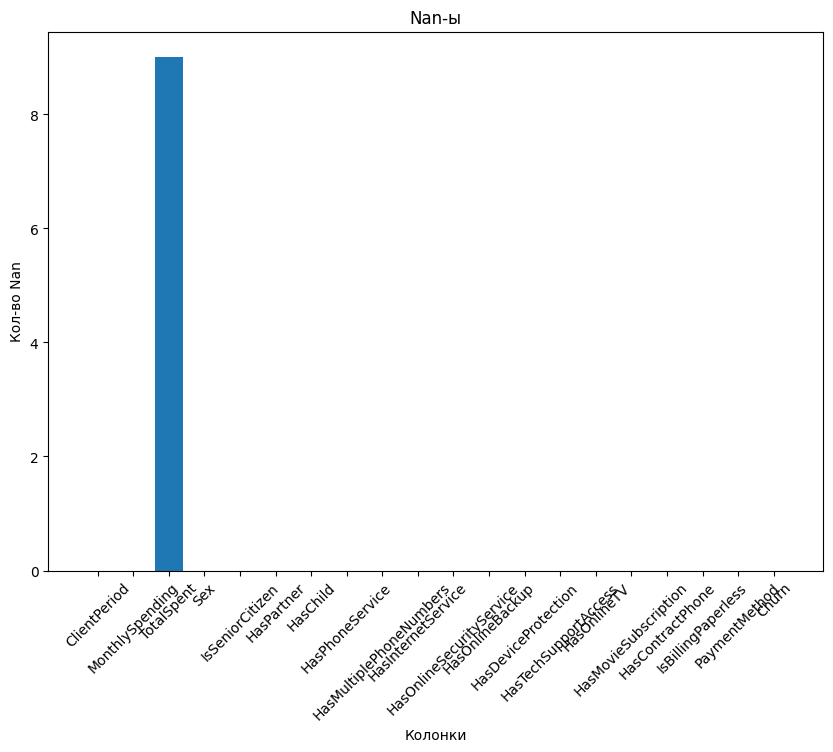

In [31]:
#посчитаем кол-во nan
nan_count = data.isna().sum()

#построение гистограммы
plt.figure(figsize=(10,7), dpi=100)
plt.bar(nan_count.index, nan_count.values)
plt.title("Nan-ы")
plt.xlabel("Колонки")
plt.ylabel("Кол-во Nan")
plt.xticks(rotation=45)
plt.show()

Видно что Nan, есть только в одной колонке, и nan-ов всего 9, а количество строк 5282, поэтому просто дропнем nan-ы

In [32]:
data.dropna(inplace=True)


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# YOUR CODE

Работа с числовыми данными

In [33]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


In [34]:
data["ClientPeriod"].name

'ClientPeriod'

In [36]:
import seaborn as sns

In [35]:
def numeric_col_visual(series):
  #построение гистограммы
  local_data = data[series]
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  fig.suptitle(series, fontsize=16)
  sns.histplot(local_data, bins=20, ax=axes[0])
  axes[0].set_title('Гистограмма')

  axes[1].scatter(local_data.index, local_data.values)
  axes[1].set_title('Scatter Plot')
  axes[1].set_xlabel('Индекс')
  axes[1].set_ylabel('Значения')

  plt.tight_layout()
  plt.show()

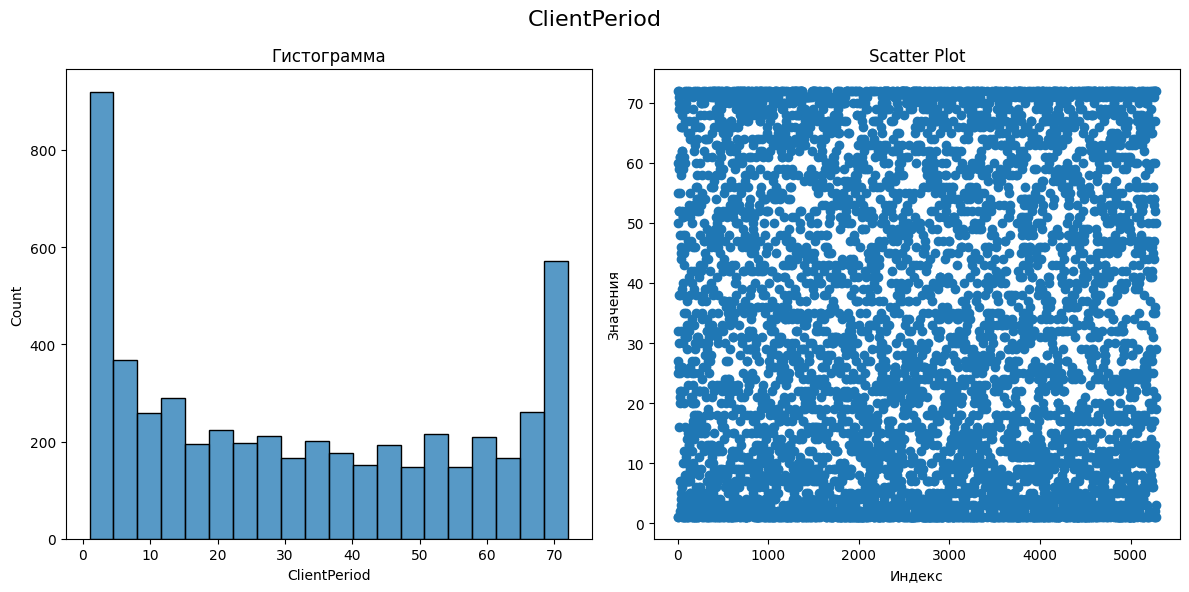

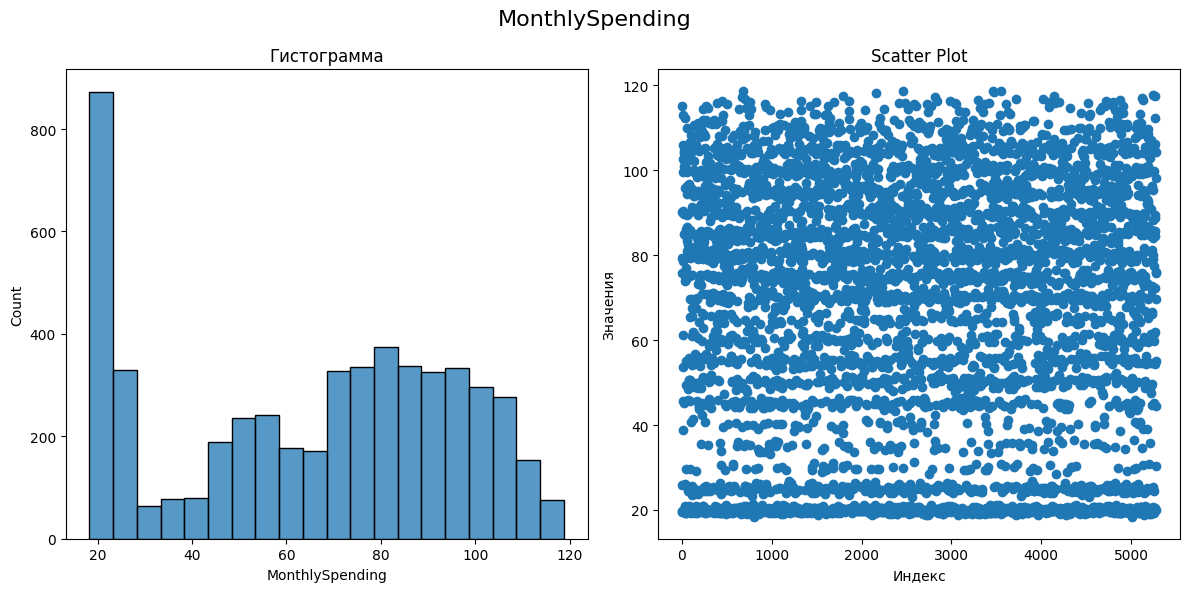

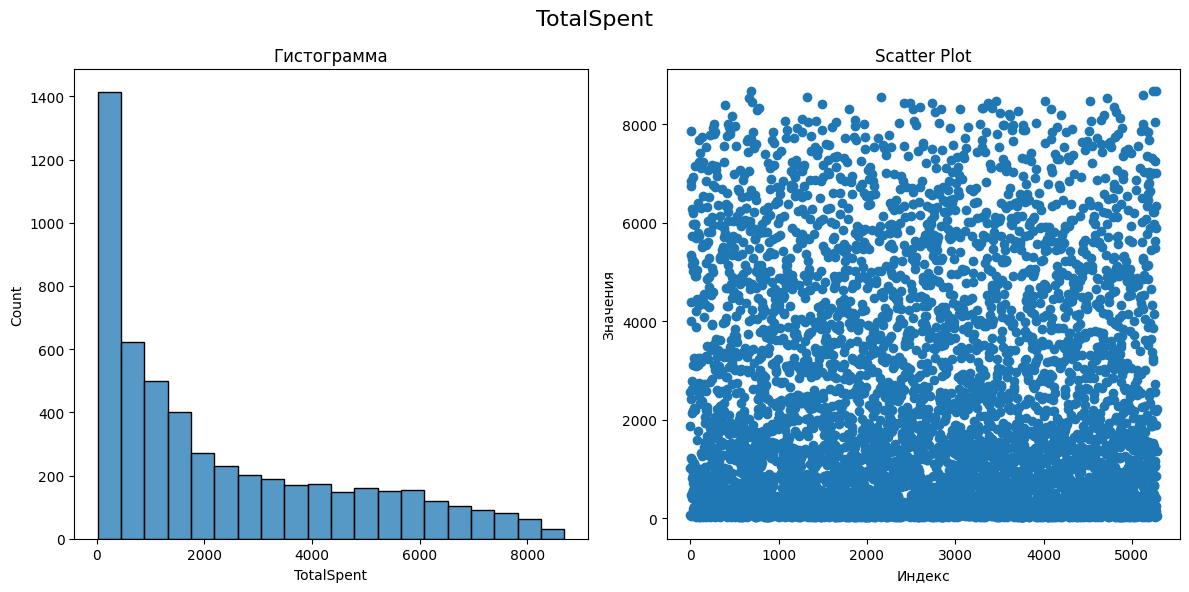

In [37]:
for col in data[num_cols]:
  numeric_col_visual(col)

In [39]:
from math import ceil

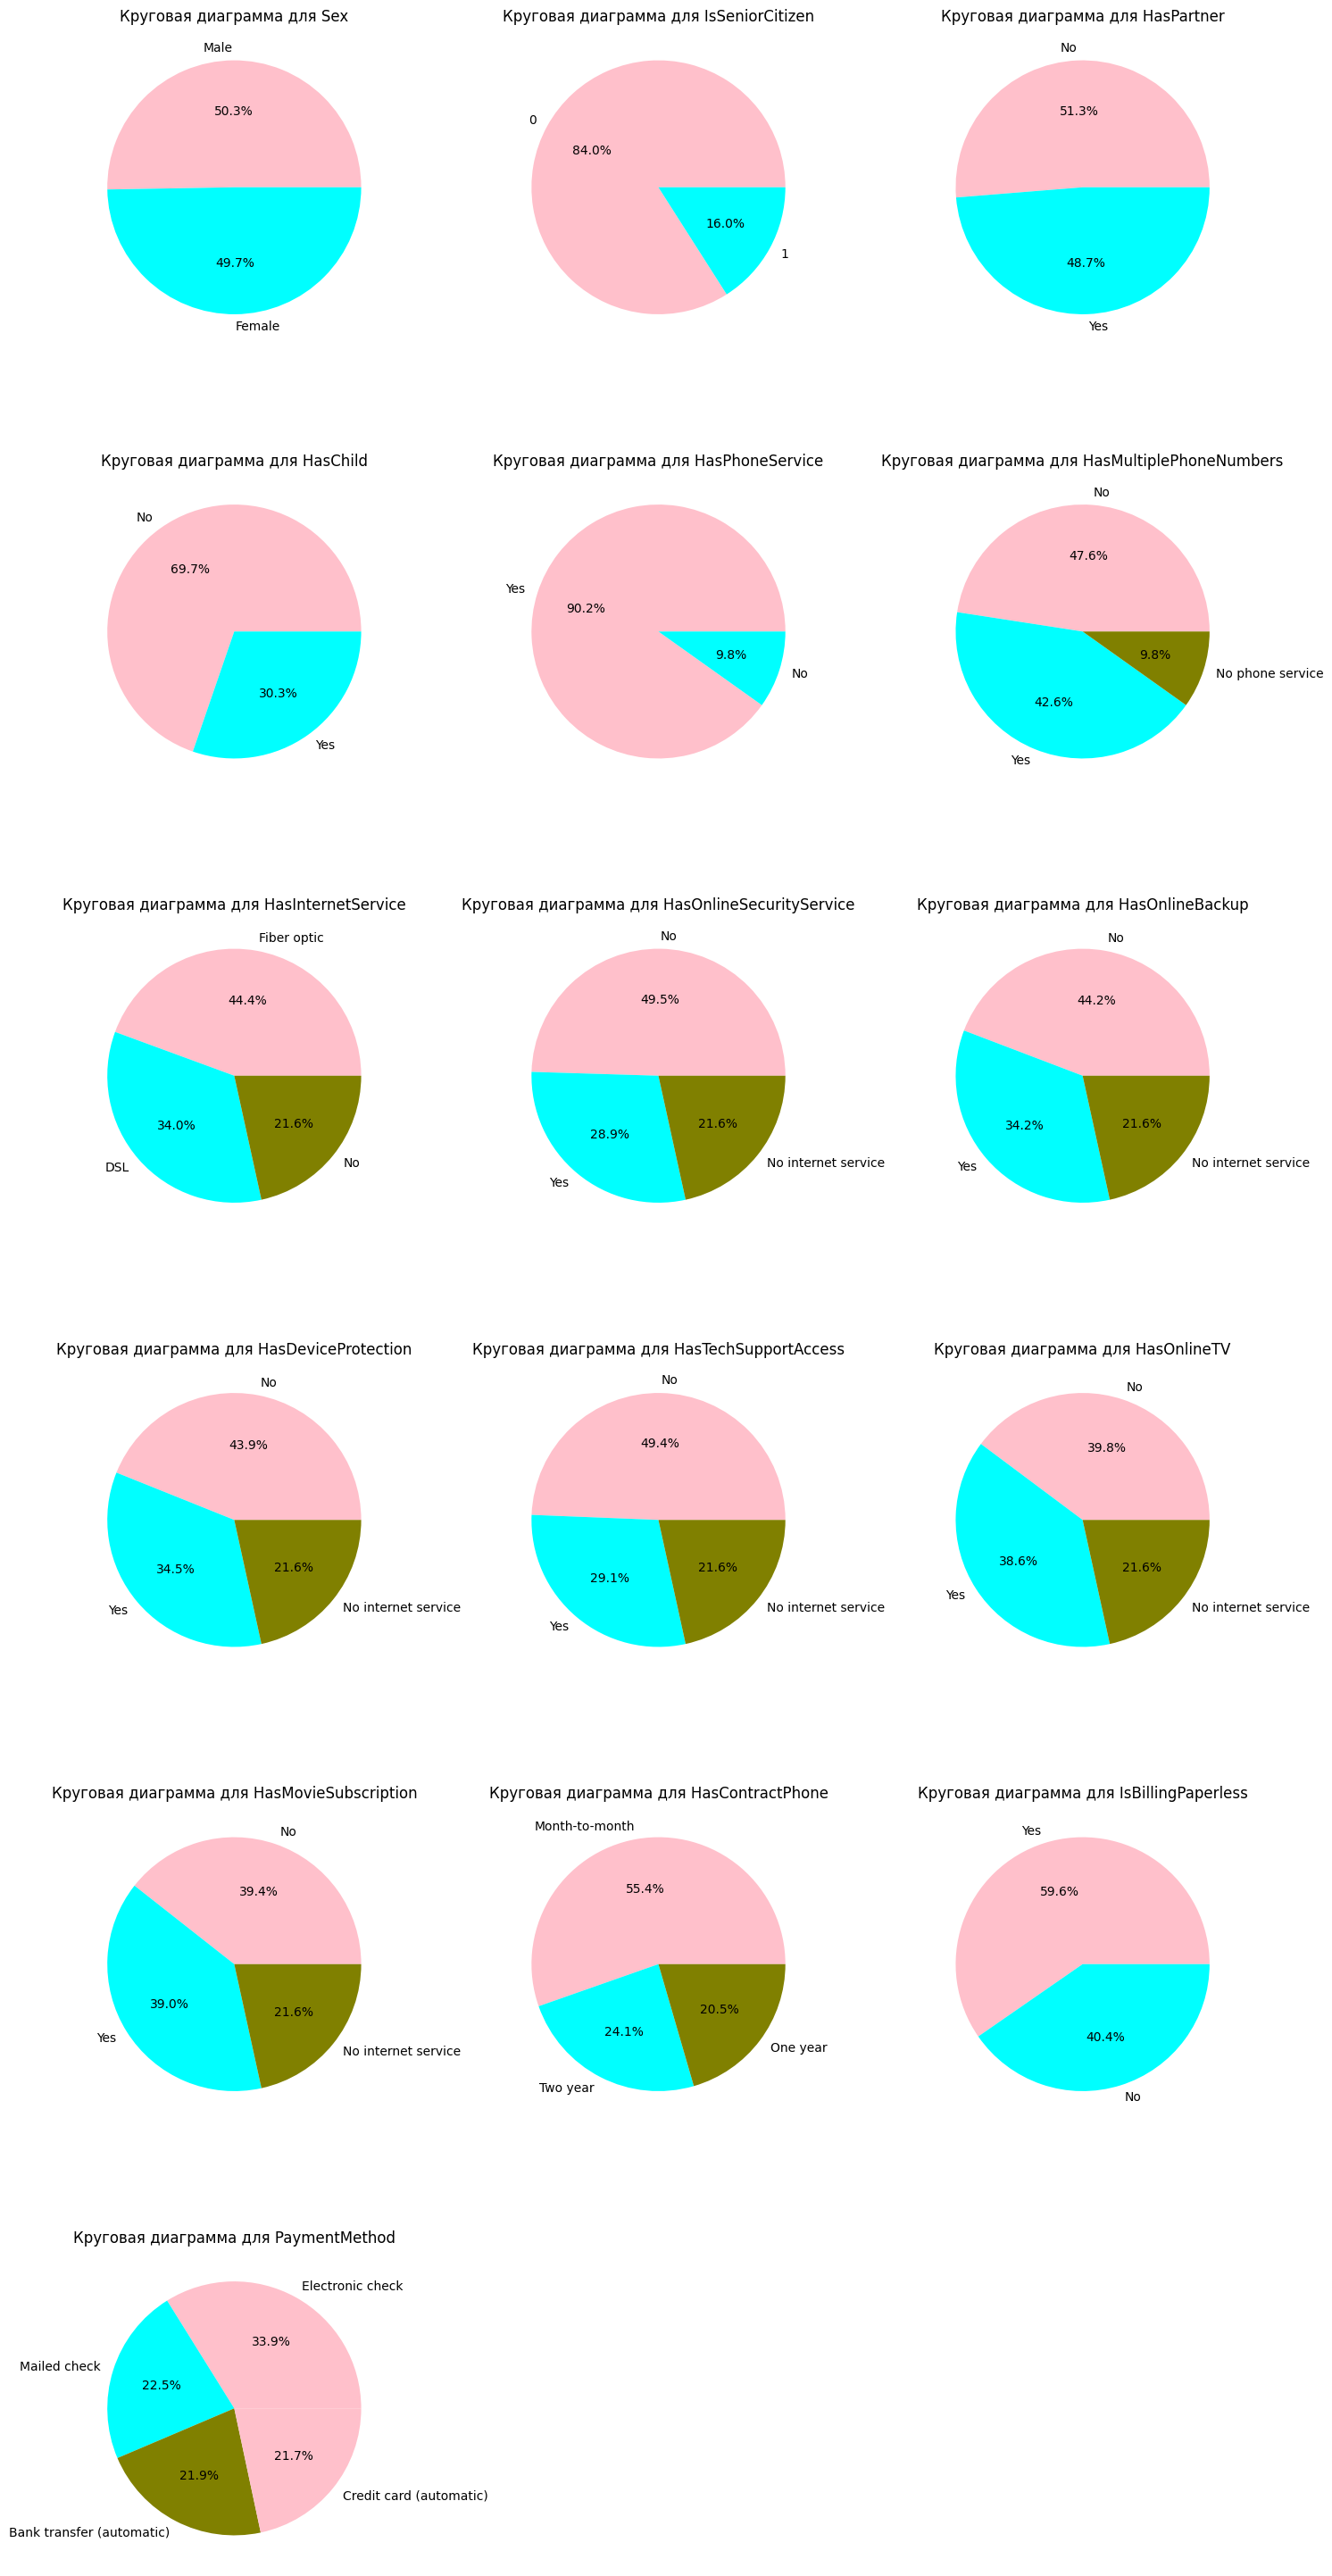

In [40]:
def numeric_col_visual(df, cols=3):
  #вычисление value_count для колонки
  calc_rows = ceil(df.shape[1] / cols)
  fig, axes = plt.subplots(nrows=calc_rows, ncols=cols, figsize=(5 *cols , 5 * calc_rows))
  axes = axes.flatten()
  for i, column in enumerate(df.columns):
    value_counts = df[column].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=["pink",'cyan','olive'])
    axes[i].set_title(f'Круговая диаграмма для {column}')
  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

numeric_col_visual(data[cat_cols])

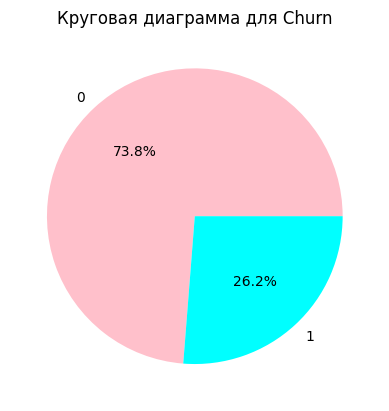

In [41]:
#посмотрим на целеувую переменную
value_counts = data[target_col].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=["pink",'cyan','olive'])
plt.title(f'Круговая диаграмма для {data[target_col].name}')
plt.show()

Видно что есть дизбаланс классов, но он не сильный поэтому обойдемся тем что будем использовать метрику roc-auc

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [43]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [57]:
#Сделаем обучение в функцию
def model_fit(model, data_cat, data_num, data_tar):
  X = data_num.join(data_cat)
  y = data_tar
  preprocessor = ColumnTransformer(
  transformers=[
        ('num', StandardScaler(), data_num.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), data_cat.columns)])
  pipeline = make_pipeline(preprocessor, model)
  param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
  grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', refit=True)
  grid_search.fit(X, y)
  print(f"Лучшее значение C: {grid_search.best_params_['logisticregression__C']}")
  print(f"Лучший ROC-AUC: {grid_search.best_score_}")
  return grid_search

In [59]:
my_grid = model_fit(LogisticRegression(), data[cat_cols], data[num_cols], data[target_col])
my_grid

Лучшее значение C: 100
Лучший ROC-AUC: 0.8448599375177531


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

In [60]:
#Проверка модели
X =  data[num_cols].join(data[cat_cols])
y =  data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
my_grid.fit(X_train, y_train)

# Прогнозы на тестовой выборке
y_pred_proba = my_grid.predict_proba(X_test)[:, 1]

# Оценка ROC-AUC на тестовой выборке
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовой выборке: {roc_auc}")

ROC-AUC на тестовой выборке: 0.8440386883698985


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [61]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [62]:
from catboost import CatBoostClassifier

In [63]:
X, y = data[feature_cols], data[target_col]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Используем стандартный catboost

In [69]:
model = CatBoostClassifier(eval_metric="AUC")
model.fit(
    X_train, y_train,
    cat_features=cat_cols,
    eval_set=(X_val, y_val),
    verbose=False)

In [70]:
roc_auc_score(y_test, model.predict(X_test))

0.7128889451049835

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Определяем модель
model = CatBoostClassifier(verbose=False)

# Задаем сетку гиперпараметров
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 300, 500]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Запускаем кросс-валидацию
grid_search.fit(X_train, y_train, cat_features=cat_cols)

# Выводим лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший ROC-AUC: ", grid_search.best_score_)

Сделаем кросс валидацию

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

In [76]:
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший ROC-AUC: ", grid_search.best_score_)

Лучшие параметры:  {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Лучший ROC-AUC:  0.8483135954963096


In [77]:
best_model = grid_search.best_estimator_
best_model.fit(X, y, cat_features=cat_cols)

# Предсказания

In [80]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_(X_test)
submission.to_csv('./my_submission.csv')

In [98]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.

In [ ]:
#качество получилось 0.85 попробуем улучушить, попробуем другие параметры

In [95]:
# Определяем модель
model = CatBoostClassifier(verbose=False, eval_metric='AUC')

# Задаем сетку гиперпараметров
param_grid = {
    'learning_rate':np.linspace(0, 1, 11),
    'depth': [4, 6, 8],
    'l2_leaf_reg': np.linspace(0, 1, 11) ,
    'iterations': [10, 20, 30]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Запускаем кросс-валидацию
grid_search.fit(X_train, y_train, cat_features=cat_cols)

# Выводим лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший ROC-AUC: ", grid_search.best_score_)

Лучшие параметры:  {'depth': 4, 'iterations': 20, 'l2_leaf_reg': 0.30000000000000004, 'learning_rate': 0.4}
Лучший ROC-AUC:  0.8477297599346958


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
495 fits failed out of a total of 5445.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2395, in

In [96]:
second_best_model = grid_search.best_estimator_

In [97]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = second_best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)


Задача решена -> ROC-AUC вашего решения равен 0.8514785250298936. Это дает вам 5.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.

Модель получилось несущественно улучушить